# Orange Team TIDBIT 1

# Background

Background Fanconi anemia is a rare genetic disease featuring characteristic developmental abnormalities, a progressive pancytopenia, genomic instability, and predisposition to cancer [1, 2]. The FA pathway contains a multiprotein core complex, including at least twelve proteins that are required for the monoubiquitylation of the FANCD2/FANCI protein complex and for other functions that are not well understood [3–6]. The core complex includes the Fanconi proteins FANCA, FANCB, FANCC, FANCE, FANCF, FANCG, FANCL, and FANCM. At least five additional proteins are associated with the FA core complex, including FAAP100, FAAP24, FAAP20, and the histone fold dimer MHF1/MHF2 [1, 4, 7–10]. The core complex proteins function together as an E3 ubiquitin ligase assembly to monoubiquitylate the heterodimeric FANCI/FANCD2 (ID) complex. The monoubiquitylation of FANCD2 is a surrogate marker for the function of the FA pathway [11]. USP1 and its binding partner UAF1 regulate the deubiquitination of FANCD2 [12]. The breast cancer susceptibility and Fanconi proteins FANCD1/BRCA2, the partner of BRCA2 (PALB2/FANCN), a helicase associated with BRCA1 (FANCJ/BACH1), and several newly identified components including FAN1, FANCO/RAD51C, and FANCP/SLX4 [13–17] participate in the pathway to respond to and repair DNA damage. (needs update with new refs)

In [167]:
import pandas as pd
import graphviz as gv
from pprint import pprint
import requests
from IPython.display import Image
from functools import reduce

## Module1 Gene Based Analysis

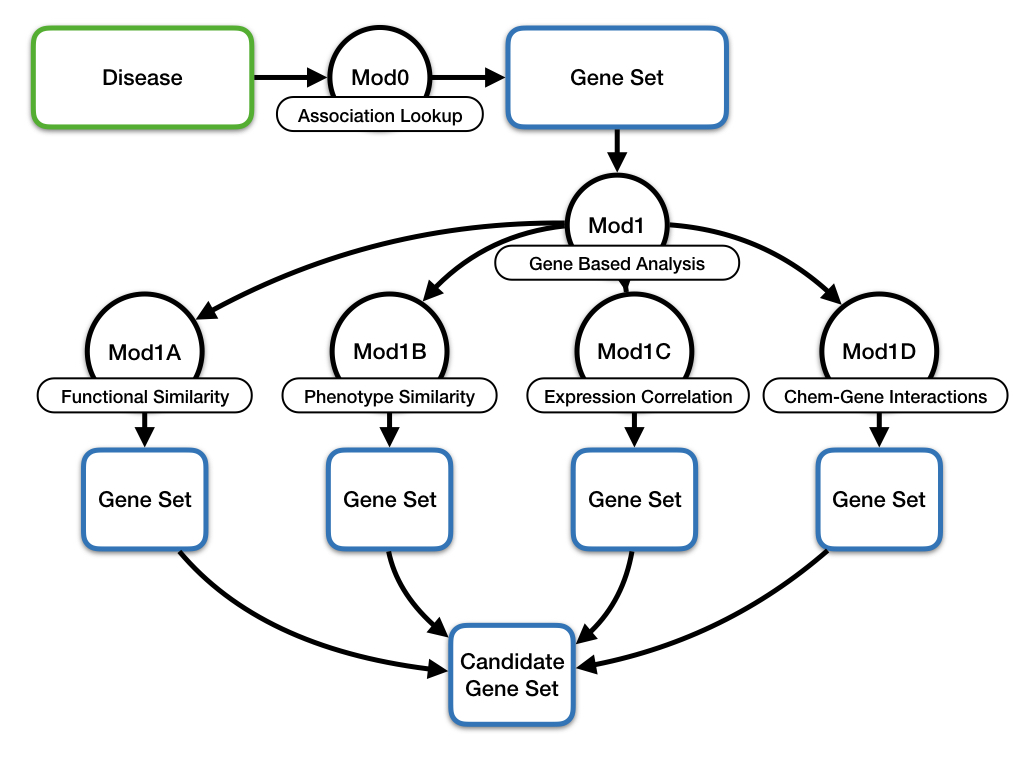

In [27]:
Image('Figures/Figures.001.jpeg')

In [3]:
from Modules.Mod0_lookups import LookUp

# workflow input is a disease identifier
lu = LookUp()

Mod O DiseaseGeneLookup metadata:
{'data_type': 'disease',
 'input_type': {'complexity': 'single', 'id_type': ['MONDO', 'DO', 'OMIM']},
 'limit': None,
 'output_type': {'complexity': 'set', 'id_type': 'HGNC'},
 'predicate': 'blm:gene associated with condition',
 'source': 'Monarch Biolink',
 'taxon': 'human'}


In [4]:
input_disease = 'MONDO:0019391' # Fanconi anemia  
input_object = {
    'input': input_disease,
    'parameters': {
        'taxon': 'human',
        'threshold': None,
    },
}

lu.load_input_object(input_object=input_object)
input_object = lu.input_object

{'description': 'Fanconi anemia (FA) is a hereditary DNA repair disorder '
                'characterized by progressive pancytopenia with bone marrow '
                'failure, variable congenital malformations and predisposition '
                'to develop hematological or solid tumors.',
 'id': 'MONDO:0019391',
 'label': 'Fanconi anemia'}


In [5]:
# get genes associated with disease from Biolink
disease_associated_genes = lu.disease_geneset_lookup()
# create list of gene curies for downstream module input
input_curie_set = disease_associated_genes[['hit_id', 'hit_symbol']].to_dict(orient='records')
# # show the 
disease_associated_genes['modules'] = 'Mod0'
disease_associated_genes
# genes to investigate TNF, FANCD2OS

,input_id,input_symbol,hit_id,hit_symbol,sources,modules
0,MONDO:0019391,Fanconi anemia,HGNC:1100,BRCA1,clinvar,Mod0
1,MONDO:0019391,Fanconi anemia,HGNC:1101,BRCA2,"orphane, omim, ctd, orphane, clinvar",Mod0
2,MONDO:0019391,Fanconi anemia,HGNC:11892,TNF,ctd,Mod0
3,MONDO:0019391,Fanconi anemia,HGNC:12829,XRCC2,"orphane, ctd, omim",Mod0
4,MONDO:0019391,Fanconi anemia,HGNC:20473,BRIP1,"ctd, orphane, omim, ctd, clinvar",Mod0
5,MONDO:0019391,Fanconi anemia,HGNC:20748,FANCL,"ctd, orphane, ctd, omim, clinvar",Mod0
6,MONDO:0019391,Fanconi anemia,HGNC:23168,FANCM,"ctd, orphane",Mod0
7,MONDO:0019391,Fanconi anemia,HGNC:23845,SLX4,"ctd, orphane, ctd, omim, clinvar",Mod0
8,MONDO:0019391,Fanconi anemia,HGNC:25009,UBE2T,"omim, ctd, clinvar, orphane",Mod0
9,MONDO:0019391,Fanconi anemia,HGNC:25539,RFWD3,orphane,Mod0


# Mod1A Functional Similarity
## Find similar genes based on GO functional annotations using OntoBio Jaccard similarity

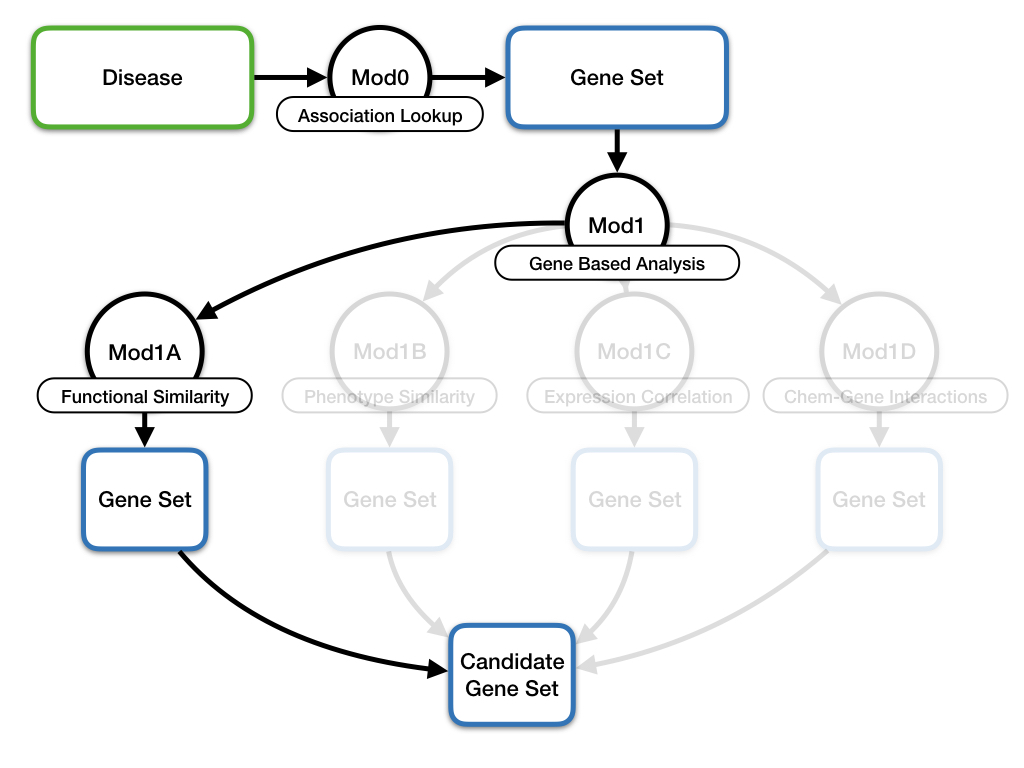

In [24]:
Image('Figures/Figures.002.jpeg')

In [7]:
from Modules.Mod1A_functional_sim import FunctionalSimilarity

In [50]:
# Module specification
mod1a_input_object_human = {
    'input': input_curie_set,
    'parameters': {
        'taxon': 'human',
        'threshold': 0.85,  # jaccard index threshold
    },
}
    
func_sim_human = FunctionalSimilarity()

Mod1A Functional Similarity metadata:
{'input_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'output_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'predicate': ['blm:macromolecular machine to biological process association',
               'macromolecular machine to molecular activity association'],
 'source': 'Monarch Biolink'}


In [51]:
func_sim_human.load_input_object(mod1a_input_object_human)
func_sim_human.load_gene_set() 

In [52]:
func_sim_human.load_associations()

In [53]:
mod1a_results = func_sim_human.compute_similarity()

In [54]:
mod1a_df = pd.DataFrame(mod1a_results)
mod1a_df = mod1a_df[mod1a_df['hit_symbol'] != mod1a_df['input_symbol']]

In [55]:
mod1a_df

,hit_id,hit_symbol,input_id,input_symbol,intersecting_annotations,score
14,HGNC:26171,FAAP100,HGNC:3583,FANCB,"[(metabolic process, GO:0008152), (cellular me...",0.857143
15,HGNC:21700,RAD9B,HGNC:3583,FANCB,"[(metabolic process, GO:0008152), (cellular me...",0.920000
17,HGNC:3586,FANCE,HGNC:3583,FANCB,"[(metabolic process, GO:0008152), (cellular me...",0.916667
18,HGNC:24994,INIP,HGNC:3583,FANCB,"[(metabolic process, GO:0008152), (cellular me...",0.851852
21,HGNC:3583,FANCB,HGNC:3586,FANCE,"[(metabolic process, GO:0008152), (cellular me...",0.916667


In [56]:
def format_curie(curie):
    return curie.replace(':', '_')

In [57]:
fa = format_curie(input_disease)

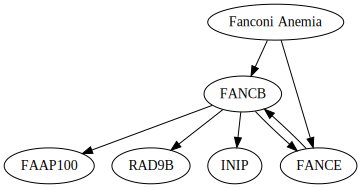

In [169]:
m1a_graph = gv.Digraph(name='Mod1A', format='png', strict=True)
m1a_graph.node(fa, label='Fanconi Anemia')
for index, row in mod1a_df.iterrows():
    m1a_graph.node(format_curie(row[0]), label=row[1])
    m1a_graph.node(format_curie(row[2]), label=row[3])
    m1a_graph.edge(fa, format_curie(row[2]))
    m1a_graph.edge(format_curie(row[2]), format_curie(row[0]))
m1a_graph   

In [59]:
inip_result_df = mod1a_df[mod1a_df['hit_symbol'] == 'INIP']

In [87]:
inip_result_df

,hit_id,hit_symbol,input_id,input_symbol,intersecting_annotations,score
18,HGNC:24994,INIP,HGNC:3583,FANCB,"[(metabolic process, GO:0008152), (cellular me...",0.851852


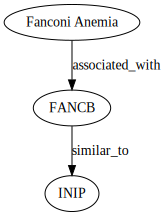

In [144]:
inip_graph = gv.Digraph(name='INIP', format='png', strict=True)
inip_graph.node(fa, label='Fanconi Anemia')
for index, row in inip_result_df.iterrows():
    inip_graph.node(format_curie(row[0]), label=row[1])
    inip_graph.node(format_curie(row[2]), label=row[3])
    inip_graph.edge(fa, format_curie(row[2]), label='associated_with')
    inip_graph.edge(format_curie(row[2]), format_curie(row[0]), label='similar_to')
inip_graph   

In [145]:
uniprot_map = {
    'INIP': 'UniProtKB:Q9NRY2',
    'FANCB': 'UniProtKB:Q8NB91'
}

In [146]:
inip_functions = [
    {
        'label': func_sim_human.ontology.label(x), 
        'id': x
    } for x in func_sim_human.associations.annotations(uniprot_map['INIP']) ]
fancb_functions = [
    {
        'label': func_sim_human.ontology.label(x), 
        'id': x,
    } for x in func_sim_human.associations.annotations(uniprot_map['FANCB']) ]

In [147]:
def graph_functions(input_node, annotations, graph):
    for anno in annotations:
        graph.node(format_curie(anno['id']), anno['label'])
        graph.edge(format_curie(input_node), format_curie(anno['id']), label='has_function')

In [148]:
graph_functions('HGNC:24994', inip_functions, inip_graph)
graph_functions('HGNC:3583', fancb_functions, inip_graph)

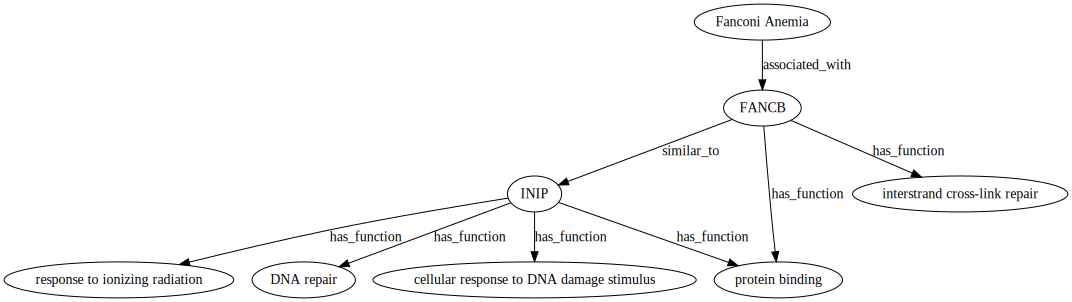

In [149]:
inip_graph

In [195]:
fancb_inferred_functions = []
for bfunc in fancb_functions:
    fancb_inferred_functions = fancb_inferred_functions + func_sim_human.ontology.ancestors(bfunc['id'], reflexive=True)

In [196]:
inip_inferred_functions = []
for ifunc in inip_functions:
    inip_inferred_functions = inip_inferred_functions + func_sim_human.ontology.ancestors(ifunc['id'], reflexive=True)

In [252]:
function_graph = gv.Digraph(name='Function Graph', strict=True, format='png', engine='circo')
function_graph.node( format_curie('HGNC:24994'),label='INIP',color='blue', shape='box', fontsize='25')
function_graph.node( format_curie('HGNC:3583'),label='FANCB',color='blue', shape='box', fontsize='25')

In [253]:
for index, ifunc in enumerate(inip_inferred_functions):
    try:
        function_graph.node(format_curie(ifunc), label=func_sim_human.ontology.label(ifunc))
        function_graph.edge(format_curie('HGNC:24994'), format_curie(ifunc))
    except Exception as e:
        print(e)
for index, bfunc in enumerate(fancb_inferred_functions):
    try:
        function_graph.node(format_curie(func), label=func_sim_human.ontology.label(func))
        function_graph.edge(format_curie('HGNC:3583'), format_curie(bfunc))
    except Exception as e:
        print(e)

In [254]:
function_graph.render()

'Function Graph.gv.png'

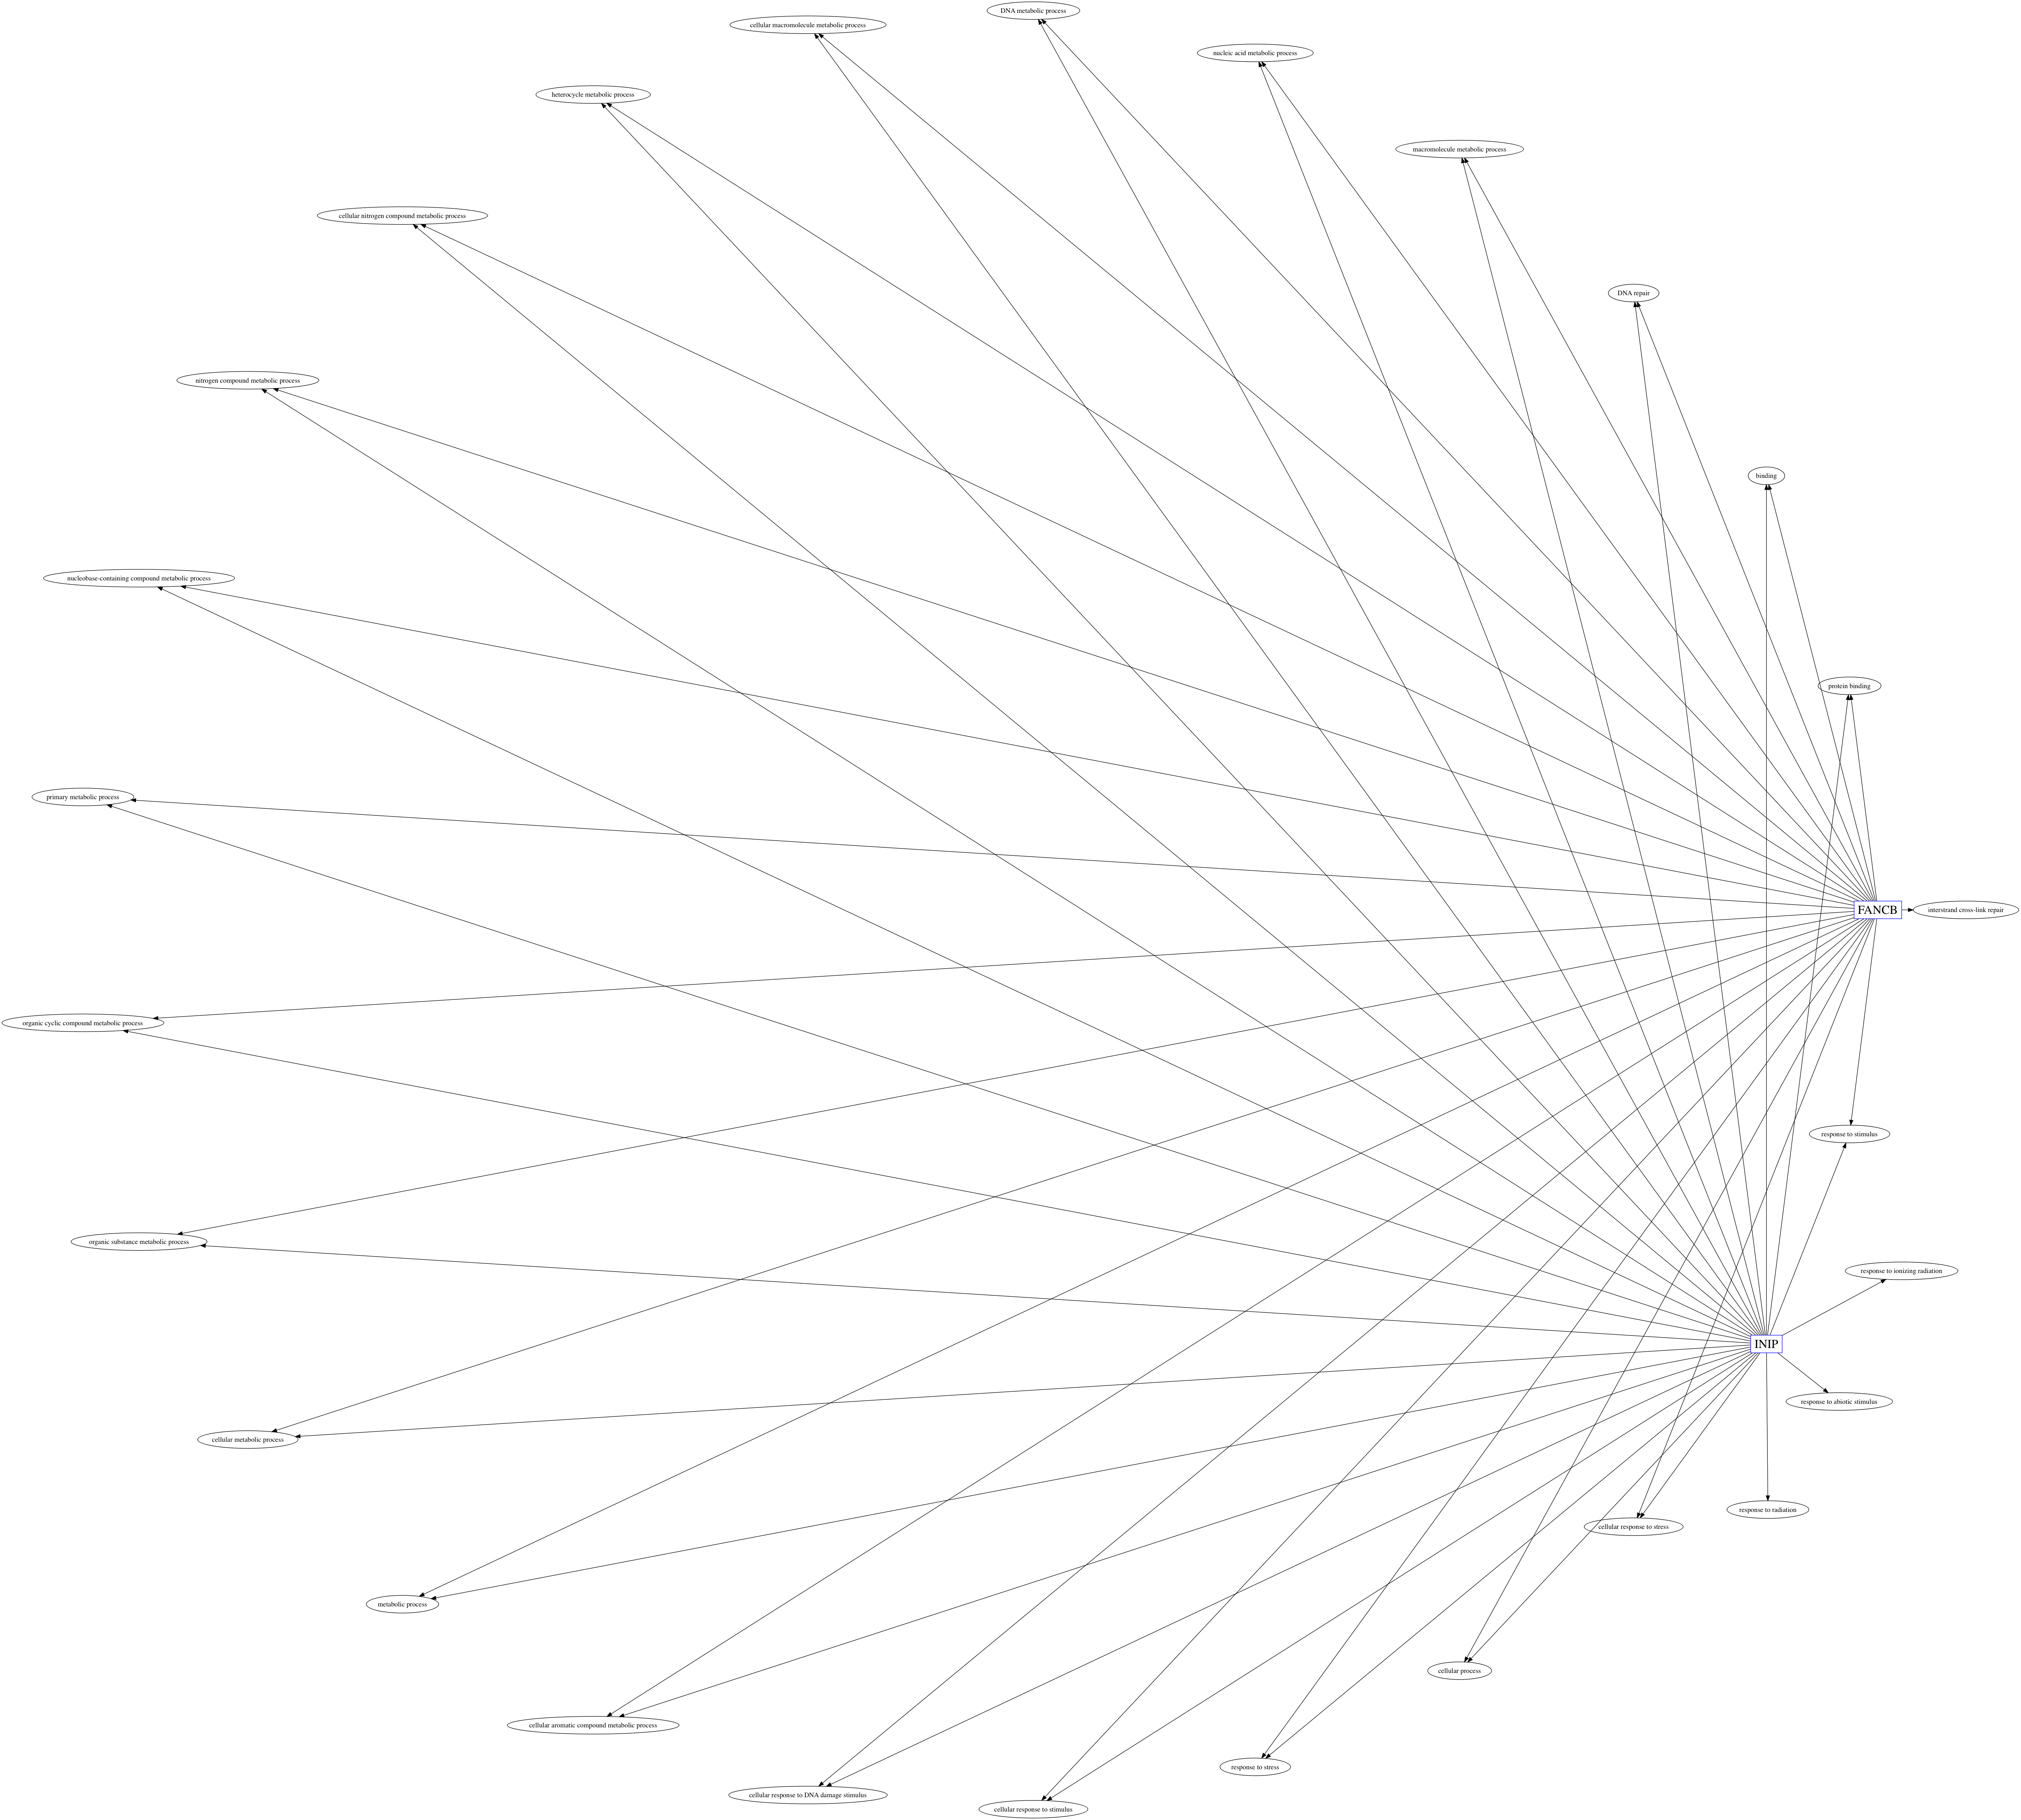

In [255]:
Image('Function Graph.gv.png')

# Analysis of example output

Candidate: INIP (INST3- AND NABP-INTERACTING PROTEIN, aka chromosome 9 open reading frame 80; c9orf80 sensor of single-stranded dna complex, subunit c; sossc Soss complex, subunit c

Note here that the various names of the protein/gene are difficult to follow using literature. Further complicating is that many genes orthologs have different names in different species. This is important because for the first time, translator can perform analyses using datasets in several species, particularly with the Monarch knowledge graph. Some functional connections may have been discovered in lower organisms and thus these analyses could be expected to give insight into the human protein function.

Supporting experimental functional relevance for INIP in FA.

Matches with the G2/M arrest observed in FA cells.

INIP is a component of the SOSS complex, a multiprotein complex that functions downstream of the MRN complex to promote DNA repair and G2/M checkpoint.

The SOSS complex associates with single-stranded DNA at DNA lesions and influences diverse endpoints in the cellular DNA damage response including cell-cycle checkpoint activation, recombinational repair and maintenance of genomic stability.

Required for efficient homologous recombination-dependent repair of double-strand breaks (DSBs) and ATM-dependent signaling pathways.

https://www.genecards.org/cgi-bin/carddisp.pl?id_type=hgnc&id=24994

INST3- AND NABP-INTERACTING PROTEIN; INIP has been found in screens for Parp inhibotr sensitivity, which is an emerging functional connection with Fanconi, see: http://cancerres.aacrjournals.org/content/canres/suppl/2013/11/18/0008-5472.CAN-13-2541.DC1/supp_table_4.pdf

Matches with the phenotype of replication stress and bone marrow failure in Fanconi.

“Ssb1 and Ssb2 cooperate to regulate mouse hematopoietic stem and progenitor cells by resolving replicative stress.” http://www.bloodjournal.org/content/129/18/2479?sso-checked=true

The actual role of C9ORF80 remains unknown, making it an interesting candidate to further explore as a possible FA modifier. https://www.ncbi.nlm.nih.gov/pubmed/29150435